In [8]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

print(os.listdir())

df = pd.read_csv('../../Data/EV_Data.csv')
df.head()



['Analise_Exploratoria.ipynb']


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [9]:
print(f"Numero de Linhas: {len(df)}(DataPoints)")
print("--------------------------")
print(f"Tendo Colunas: ")

for col in df.columns:
    print(col)

print("--------------------------")

Numero de Linhas: 3798(DataPoints)
--------------------------
Tendo Colunas: 
region
category
parameter
mode
powertrain
year
unit
value
--------------------------


In [10]:
print("--------------------------")
print("Parametros distintos na coluna 'parameters':")
for param in df['parameter'].unique():
    print(param)
print("--------------------------")

--------------------------
Parametros distintos na coluna 'parameters':
EV sales
EV stock share
EV sales share
EV stock
Electricity demand
Oil displacement Mbd
Oil displacement, million lge
--------------------------


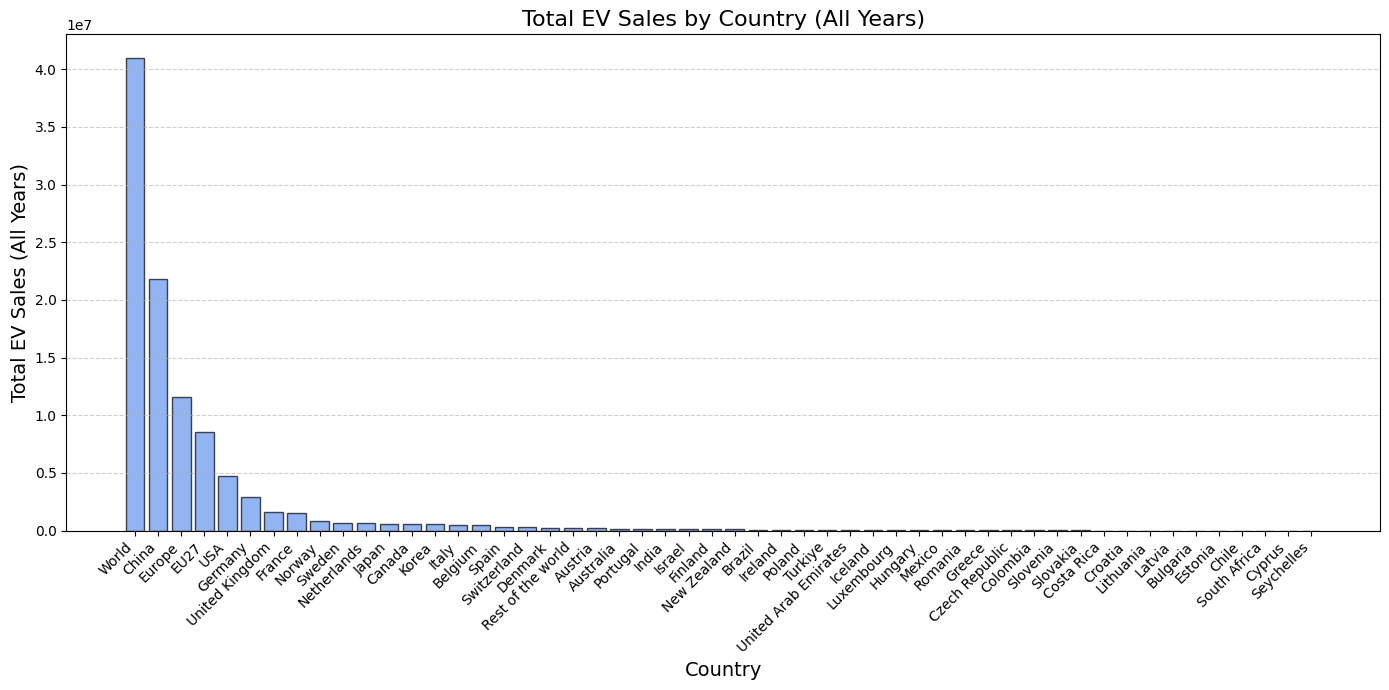

In [11]:

# Filtra apenas linhas com parâmetro 'EV sales'
ev_sales_df = df[df['parameter'] == 'EV sales'].copy()

# Agrupa por país, somando todas as vendas de todos os anos
country_sales = ev_sales_df.groupby('region')['value'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
plt.bar(country_sales.index, country_sales.values, color='cornflowerblue', edgecolor='black', alpha=0.7)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total EV Sales (All Years)', fontsize=14)
plt.title('Total EV Sales by Country (All Years)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

def compare_linked(df, region, p1, p2):
    # 1) Filtra só a região desejada
    region_df = df[df['region'] == region].copy()
    
    # 2) Pivot por ano e parâmetro, preenchendo anos faltantes com 0
    pivot_df = (
        region_df
        .pivot_table(index='year',
                     columns='parameter',
                     values='value',
                     aggfunc='sum')
        .reindex(range(region_df['year'].min(),
                       region_df['year'].max() + 1),
                 fill_value=0)
    )
    
    # 3) Verifica existência dos parâmetros
    for p in (p1, p2):
        if p not in pivot_df.columns:
            raise ValueError(f"Parameter '{p}' not in data for region '{region}'. "
                             f"Available: {pivot_df.columns.tolist()}")
    pivot_df = pivot_df[[p1, p2]]
    
    # 4) Normaliza para 100% no primeiro ano
    pct_df = pivot_df.divide(pivot_df.iloc[0]) * 100
    
    # 5) Plota com eixos vinculados
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    color1 = 'tab:blue'
    ax1.set_xlabel('Year', fontsize=14)
    ax1.set_ylabel(f'{p1} (% of initial)', color=color1, fontsize=14)
    ax1.set_ylim(100, pct_df.max().max() * 1.1)
    ln1 = ax1.plot(pct_df.index, pct_df[p1],
                   marker='o', color=color1, linewidth=2, label=p1)
    ax1.tick_params(axis='y', labelcolor=color1)
    
    ax2 = ax1.twinx()
    color2 = 'tab:green'
    ax2.set_ylabel(f'{p2} (% of initial)', color=color2, fontsize=14)
    ax2.set_ylim(100, pct_df.max().max() * 1.1)
    ln2 = ax2.plot(pct_df.index, pct_df[p2],
                   marker='o', color=color2, linewidth=2, label=p2)
    ax2.tick_params(axis='y', labelcolor=color2)
    
    # Combina legendas
    lns = ln1 + ln2
    labels = [l.get_label() for l in lns]
    ax1.legend(lns, labels, loc='upper left', fontsize=12)
    
    plt.title(f'{p1} and {p2} as % of Initial Value in {region}', fontsize=16)
    ax1.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()



In [13]:
def compare(df, region, p1, p2):
    region_df = df[df['region'] == region].copy()

    pivot_df = (
        region_df
        .pivot_table(
            index='year',
            columns='parameter',
            values='value',
            aggfunc='sum'
        )
    )

    # Guarantee both columns exist and in the right order
    if p1 not in pivot_df.columns or p2 not in pivot_df.columns:
        print(f"Columns available: {pivot_df.columns.tolist()}")
        raise ValueError(f"Parameters '{p1}' or '{p2}' not found for region '{region}'.")

    pivot_df = pivot_df[[p1, p2]]

    fig, ax = plt.subplots(figsize=(12, 6))

    color1 = 'tab:blue'
    color2 = 'tab:green'

    ax.plot(pivot_df.index, pivot_df[p1], marker='o', color=color1, linewidth=2, label=p1)
    ax.plot(pivot_df.index, np.log(pivot_df[p2]), marker='o', color=color2, linewidth=2, label=p2)

    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Value', fontsize=14)
    ax.tick_params(axis='y')
    ax.legend(loc='upper left', fontsize=12)
    plt.title(f'{p1} and {p2} Over Time in {region}', fontsize=16)
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# EV Stock vs EV sales

Stock vs Sales


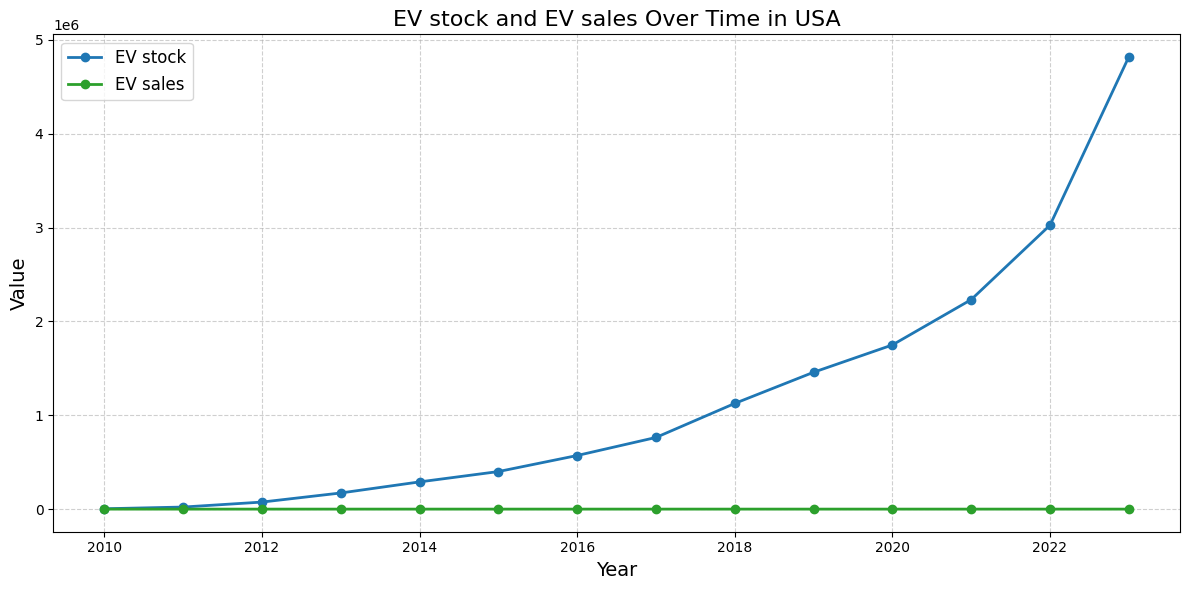

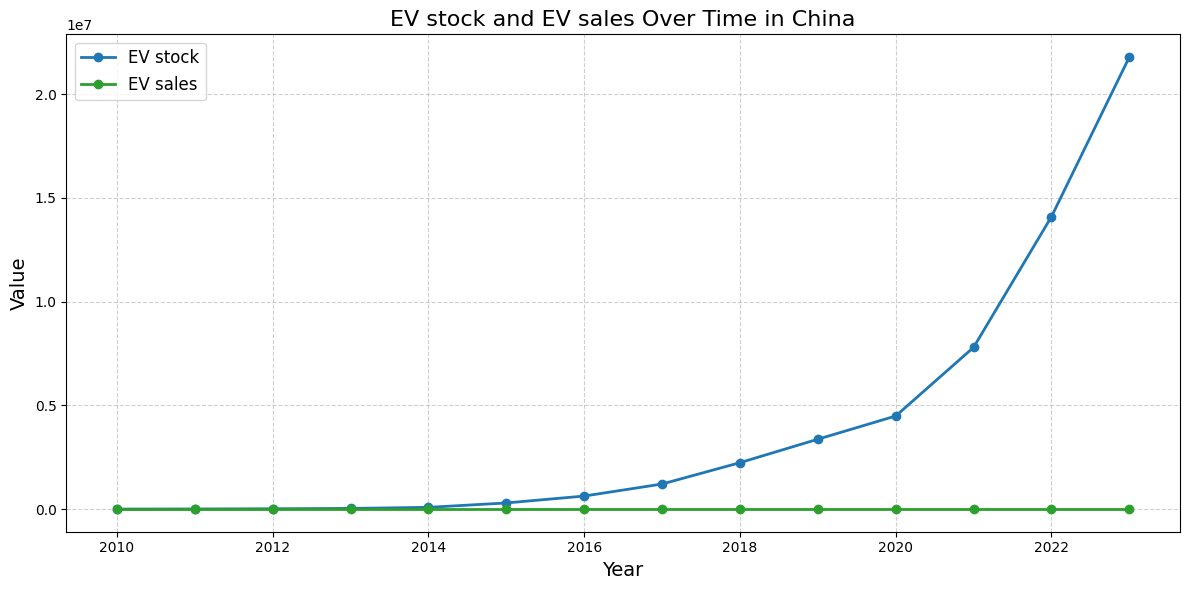

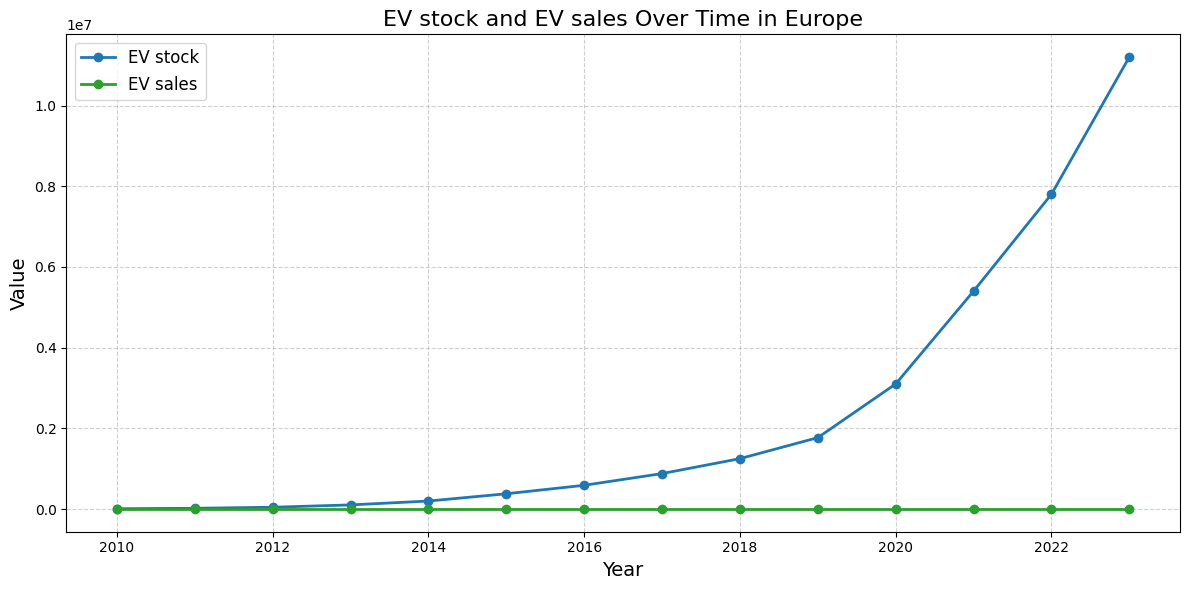

In [14]:
print("Stock vs Sales")
compare(df, 'USA', 'EV stock', 'EV sales')
compare(df, 'China', 'EV stock', 'EV sales')
compare(df, 'Europe', 'EV stock', 'EV sales')


# Electricity demand vs EV sales

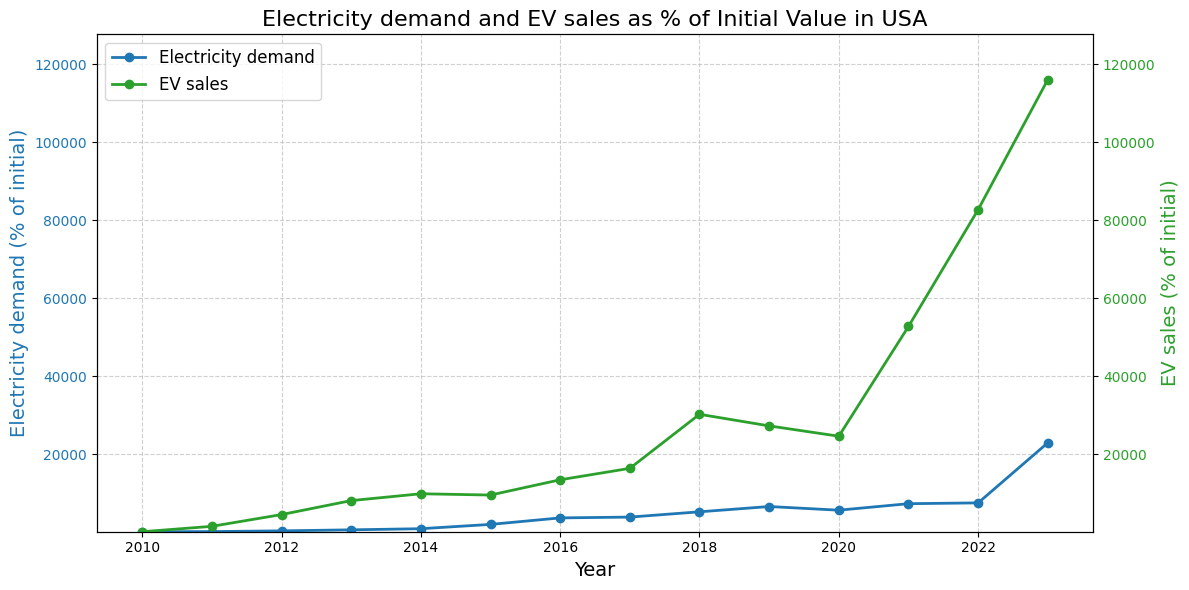

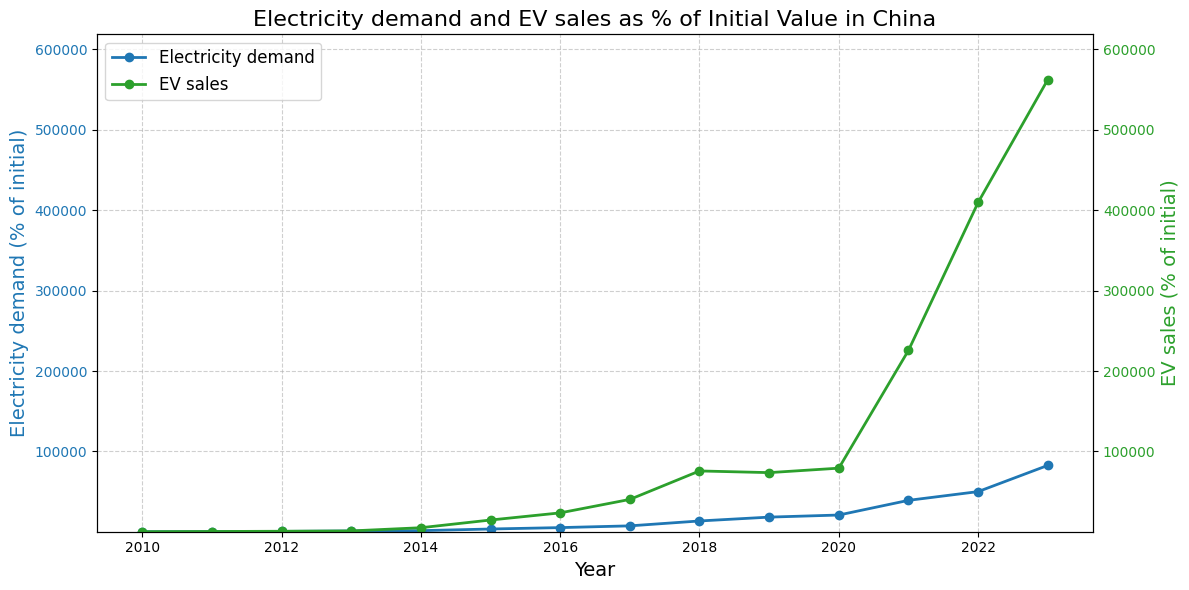

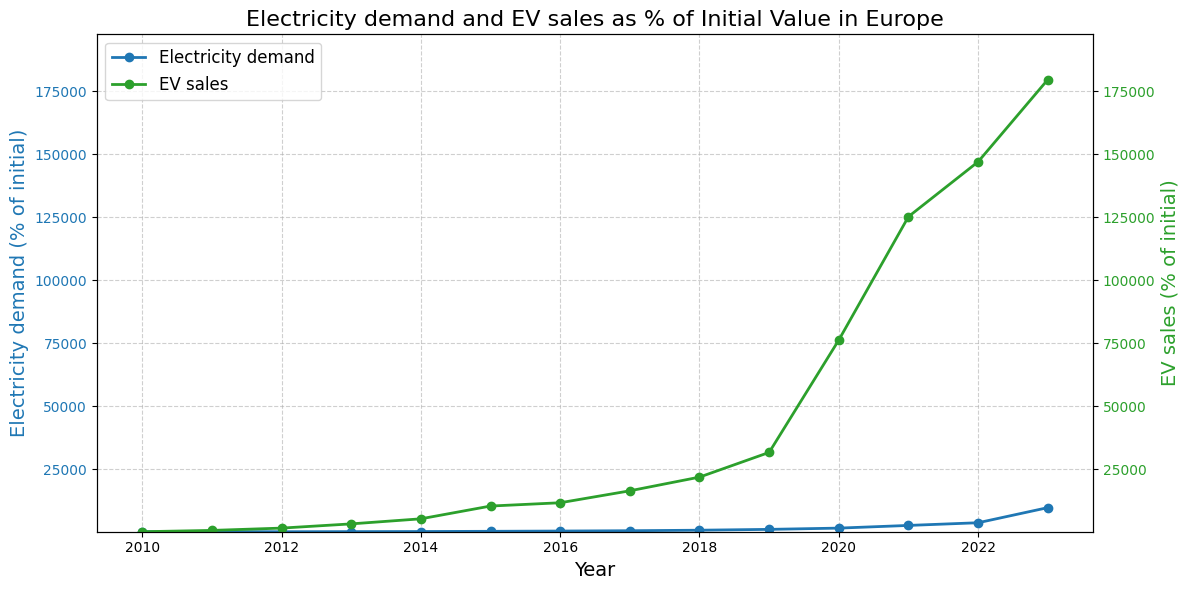

In [15]:
compare_linked(df, 'USA', 'Electricity demand', 'EV sales')
compare_linked(df, 'China', 'Electricity demand', 'EV sales')
compare_linked(df, 'Europe', 'Electricity demand', 'EV sales')

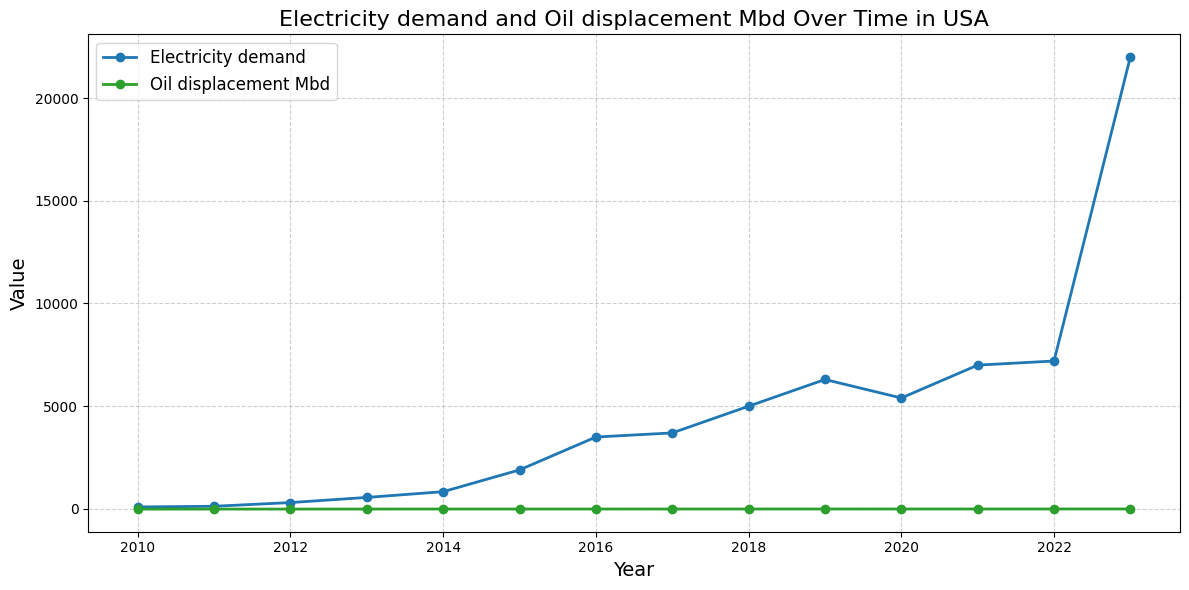

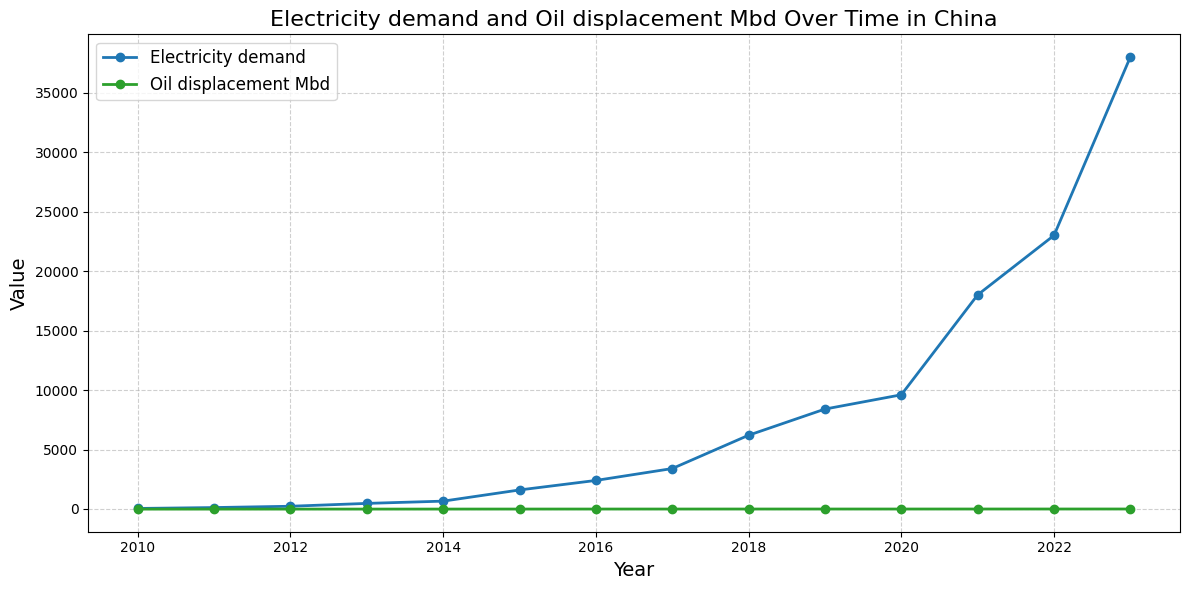

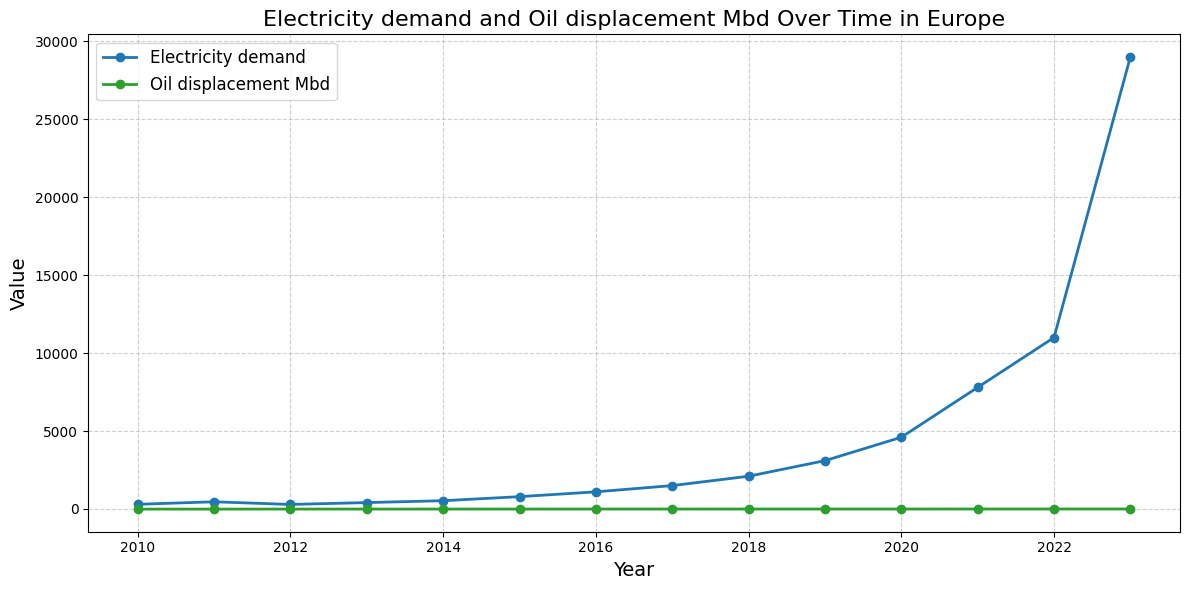

In [16]:
compare(df, 'USA', 'Electricity demand', 'Oil displacement Mbd')
compare(df, 'China', 'Electricity demand', 'Oil displacement Mbd')
compare(df, 'Europe', 'Electricity demand', 'Oil displacement Mbd')